In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from drug import DrugFeatureExtractor
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

In [2]:
smiles_list = ["CCO", "CCN", "CCCl", "CCCC", "c1ccccc1"]

In [3]:
def visualize_molecule_3d(smiles):
    # Convert SMILES to molecule
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid SMILES string")
    
    # Add hydrogens and generate 3D coordinates
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    AllChem.MMFFOptimizeMolecule(mol)
    
    # Convert molecule to MOL block
    mol_block = Chem.MolToMolBlock(mol)
    
    # Visualize using py3Dmol
    viewer = py3Dmol.view(width=400, height=400)
    viewer.addModel(mol_block, "mol")
    viewer.setStyle({"stick": {}})
    viewer.zoomTo()
    return viewer

In [4]:
extractor = DrugFeatureExtractor()

# Extract features
data = []
for smiles in smiles_list:
    try:
        features = extractor.extract_features(smiles)
        data.append(features[:len(extractor.feature_names)])  # Exclude fingerprint
    except ValueError as e:
        print(f"Error with SMILES {smiles}: {e}")

# Convert to DataFrame
feature_df = pd.DataFrame(data, columns=extractor.feature_names)

[20:55:38] DEPRECATION WARNING: please use MorganGenerator
[20:55:38] DEPRECATION WARNING: please use MorganGenerator
[20:55:38] DEPRECATION WARNING: please use MorganGenerator
[20:55:38] DEPRECATION WARNING: please use MorganGenerator
[20:55:38] DEPRECATION WARNING: please use MorganGenerator


In [5]:
for smiles in smiles_list:
    try:
        print(f"3D visualization for {smiles}:")
        viewer = visualize_molecule_3d(smiles)
        viewer.show()
    except ValueError as e:
        print(f"Error with SMILES {smiles}: {e}")

3D visualization for CCO:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3D visualization for CCN:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3D visualization for CCCl:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3D visualization for CCCC:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3D visualization for c1ccccc1:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

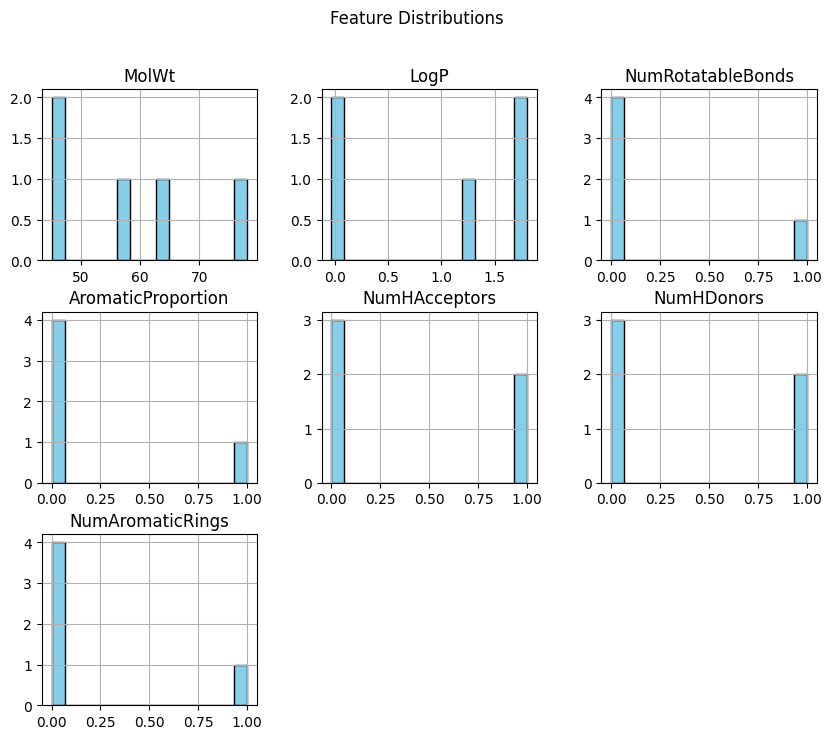

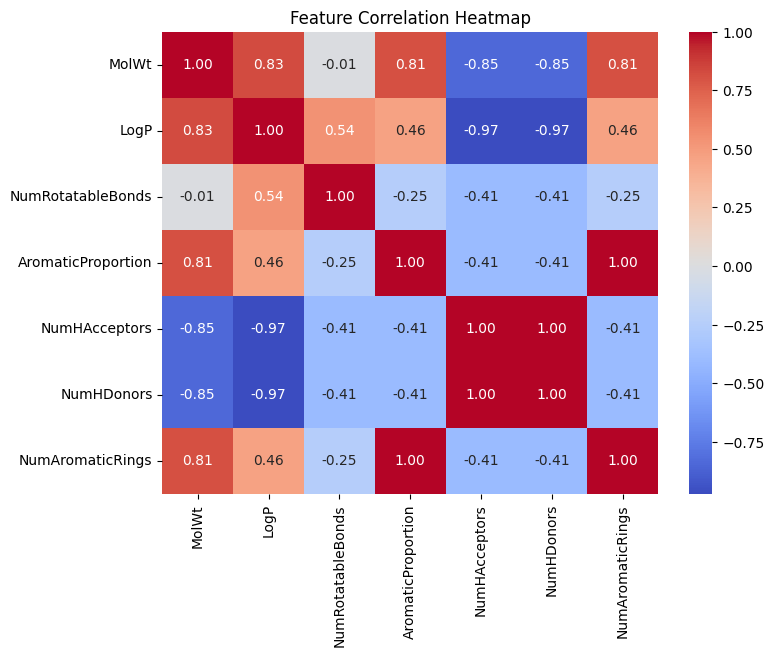

[20:57:33] DEPRECATION WARNING: please use MorganGenerator


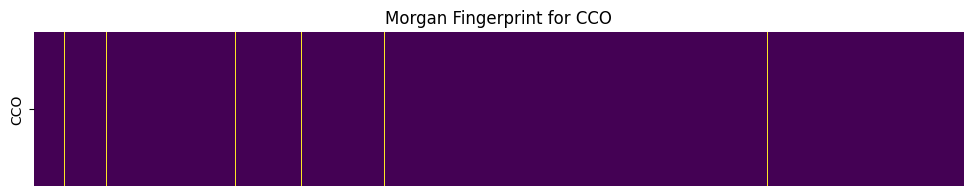

[20:57:33] DEPRECATION WARNING: please use MorganGenerator


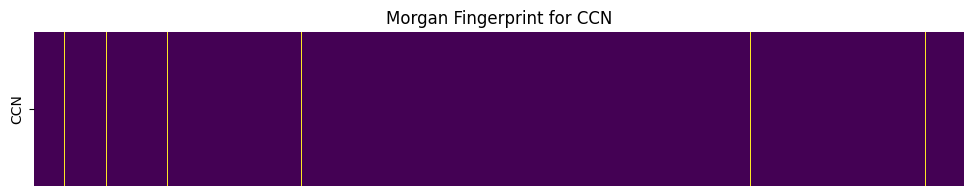

[20:57:33] DEPRECATION WARNING: please use MorganGenerator


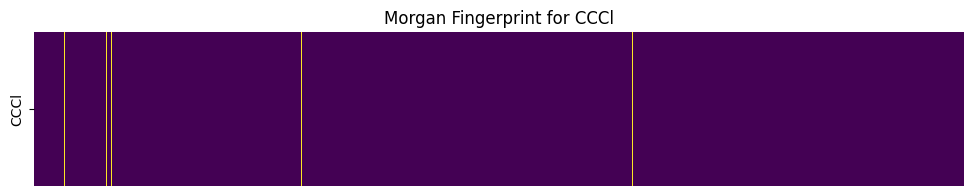

[20:57:33] DEPRECATION WARNING: please use MorganGenerator


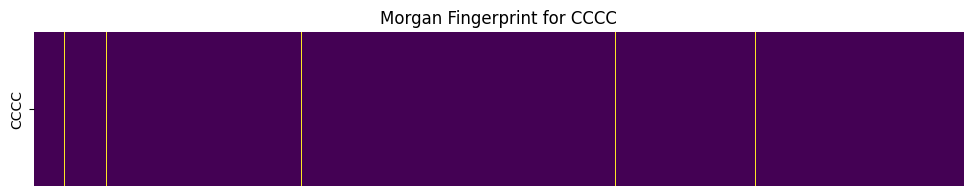

[20:57:33] DEPRECATION WARNING: please use MorganGenerator


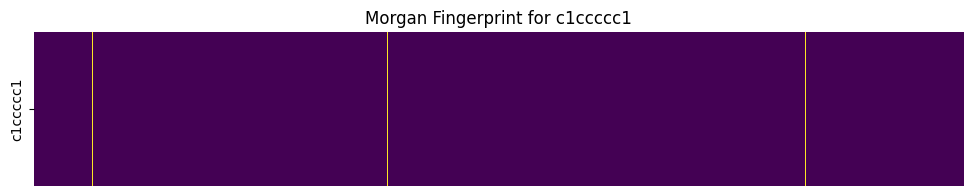

In [6]:
# Visualization: Histograms
feature_df.hist(figsize=(10, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

# Visualization: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(feature_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



# Visualization: Morgan Fingerprint Heatmap
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        morgan_fp = extractor.get_morgan_fingerprint(mol)
        plt.figure(figsize=(12, 2))
        sns.heatmap([morgan_fp], cmap='viridis', cbar=False, xticklabels=False, yticklabels=[smiles])
        plt.title(f"Morgan Fingerprint for {smiles}")
        plt.show()